
Successfully read the dataset
╒════╤═══════════════╤═══════════╤═════════════════╤═════════════════╤═══════════╤═══════╤════════════════════════════╤═══════╤═══════════╕
│    │   Pregnancies │   Glucose │   BloodPressure │   SkinThickness │   Insulin │   BMI │   DiabetesPedigreeFunction │   Age │   Outcome │
╞════╪═══════════════╪═══════════╪═════════════════╪═════════════════╪═══════════╪═══════╪════════════════════════════╪═══════╪═══════════╡
│  0 │             6 │       148 │              72 │              35 │         0 │  33.6 │                      0.627 │    50 │         1 │
╘════╧═══════════════╧═══════════╧═════════════════╧═════════════════╧═══════════╧═══════╧════════════════════════════╧═══════╧═══════════╛

Data prep begins

	Dropping null rows

	From the plot, we see that the class distribution is balanced.

	Generating plots to see how features measure up against the class atttribute

	 From the plot, we see that the class labels are well distributed across all feature

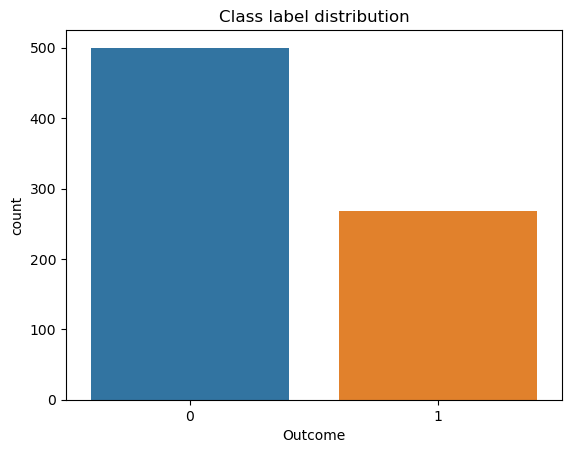

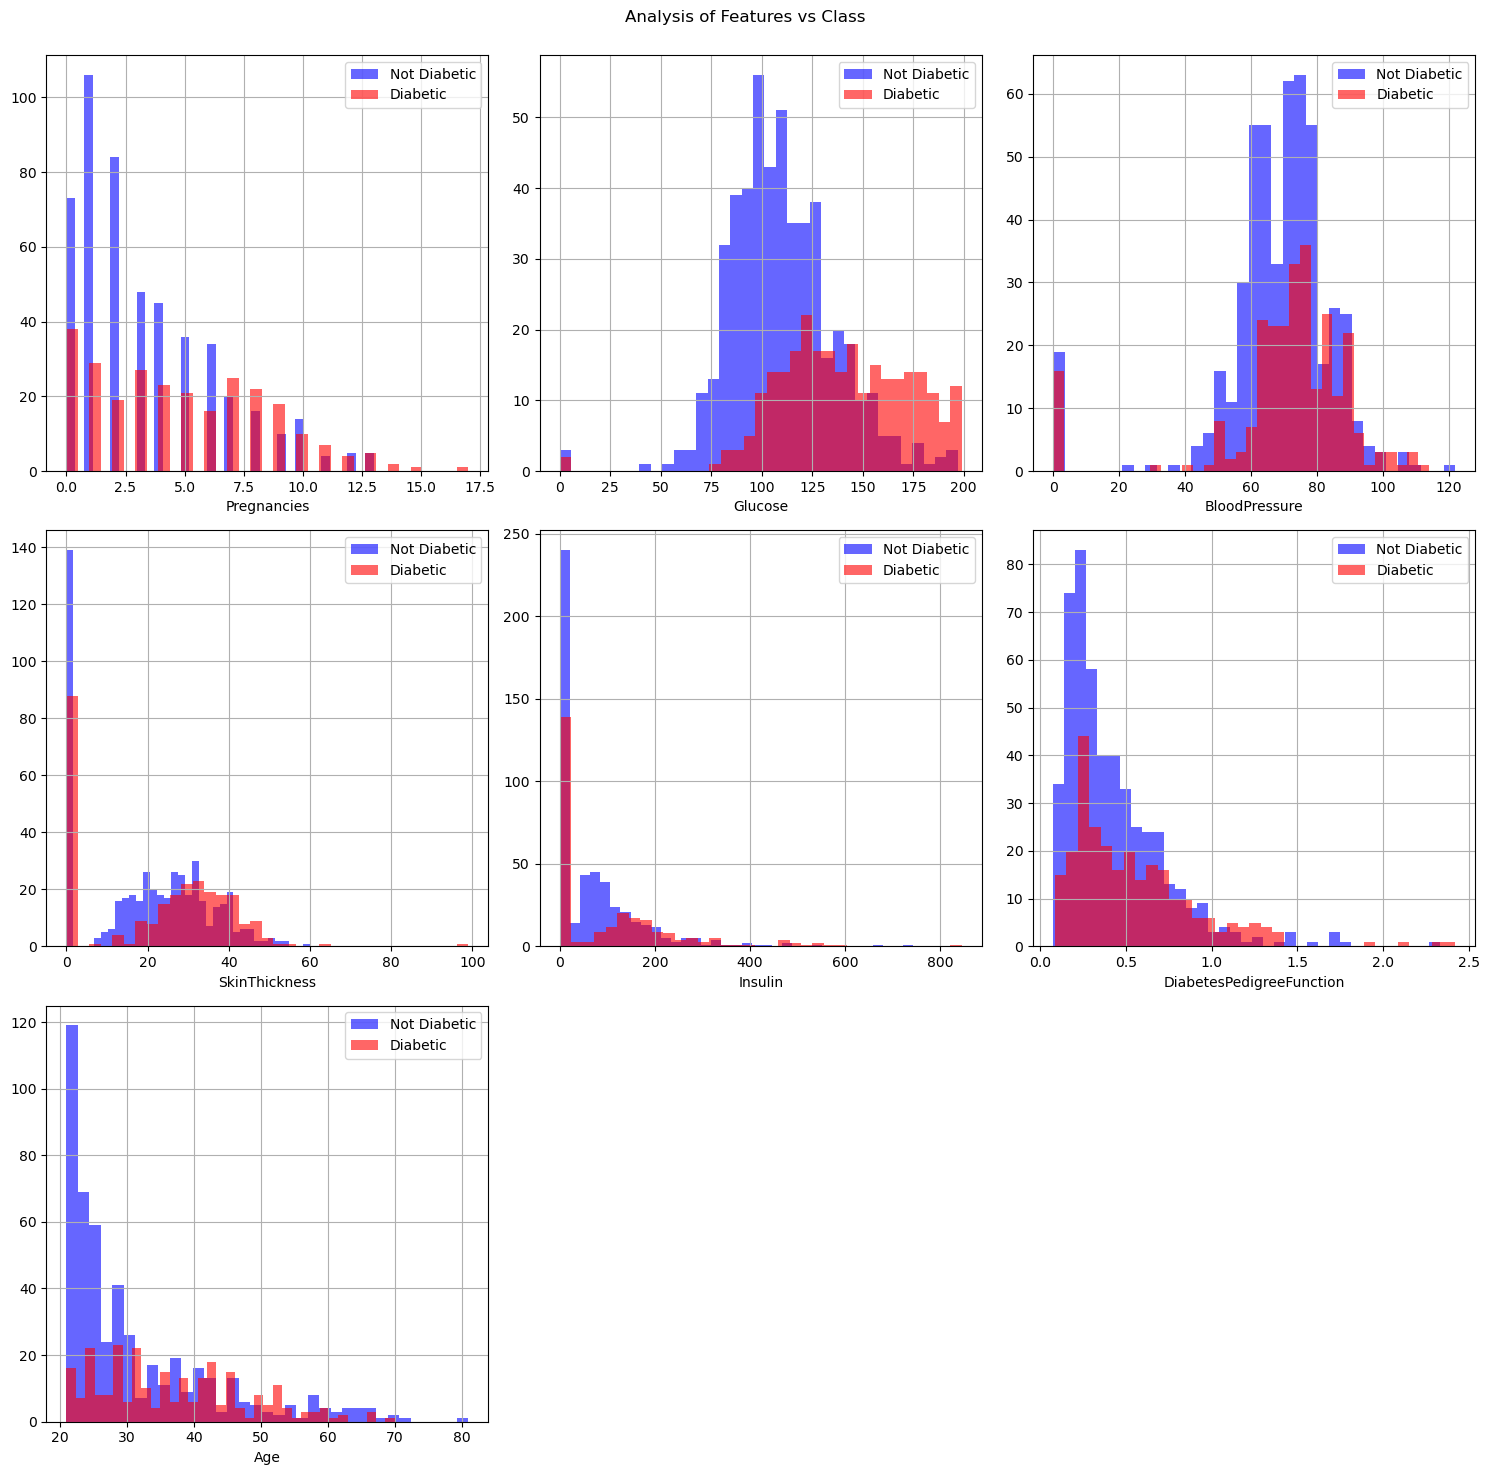

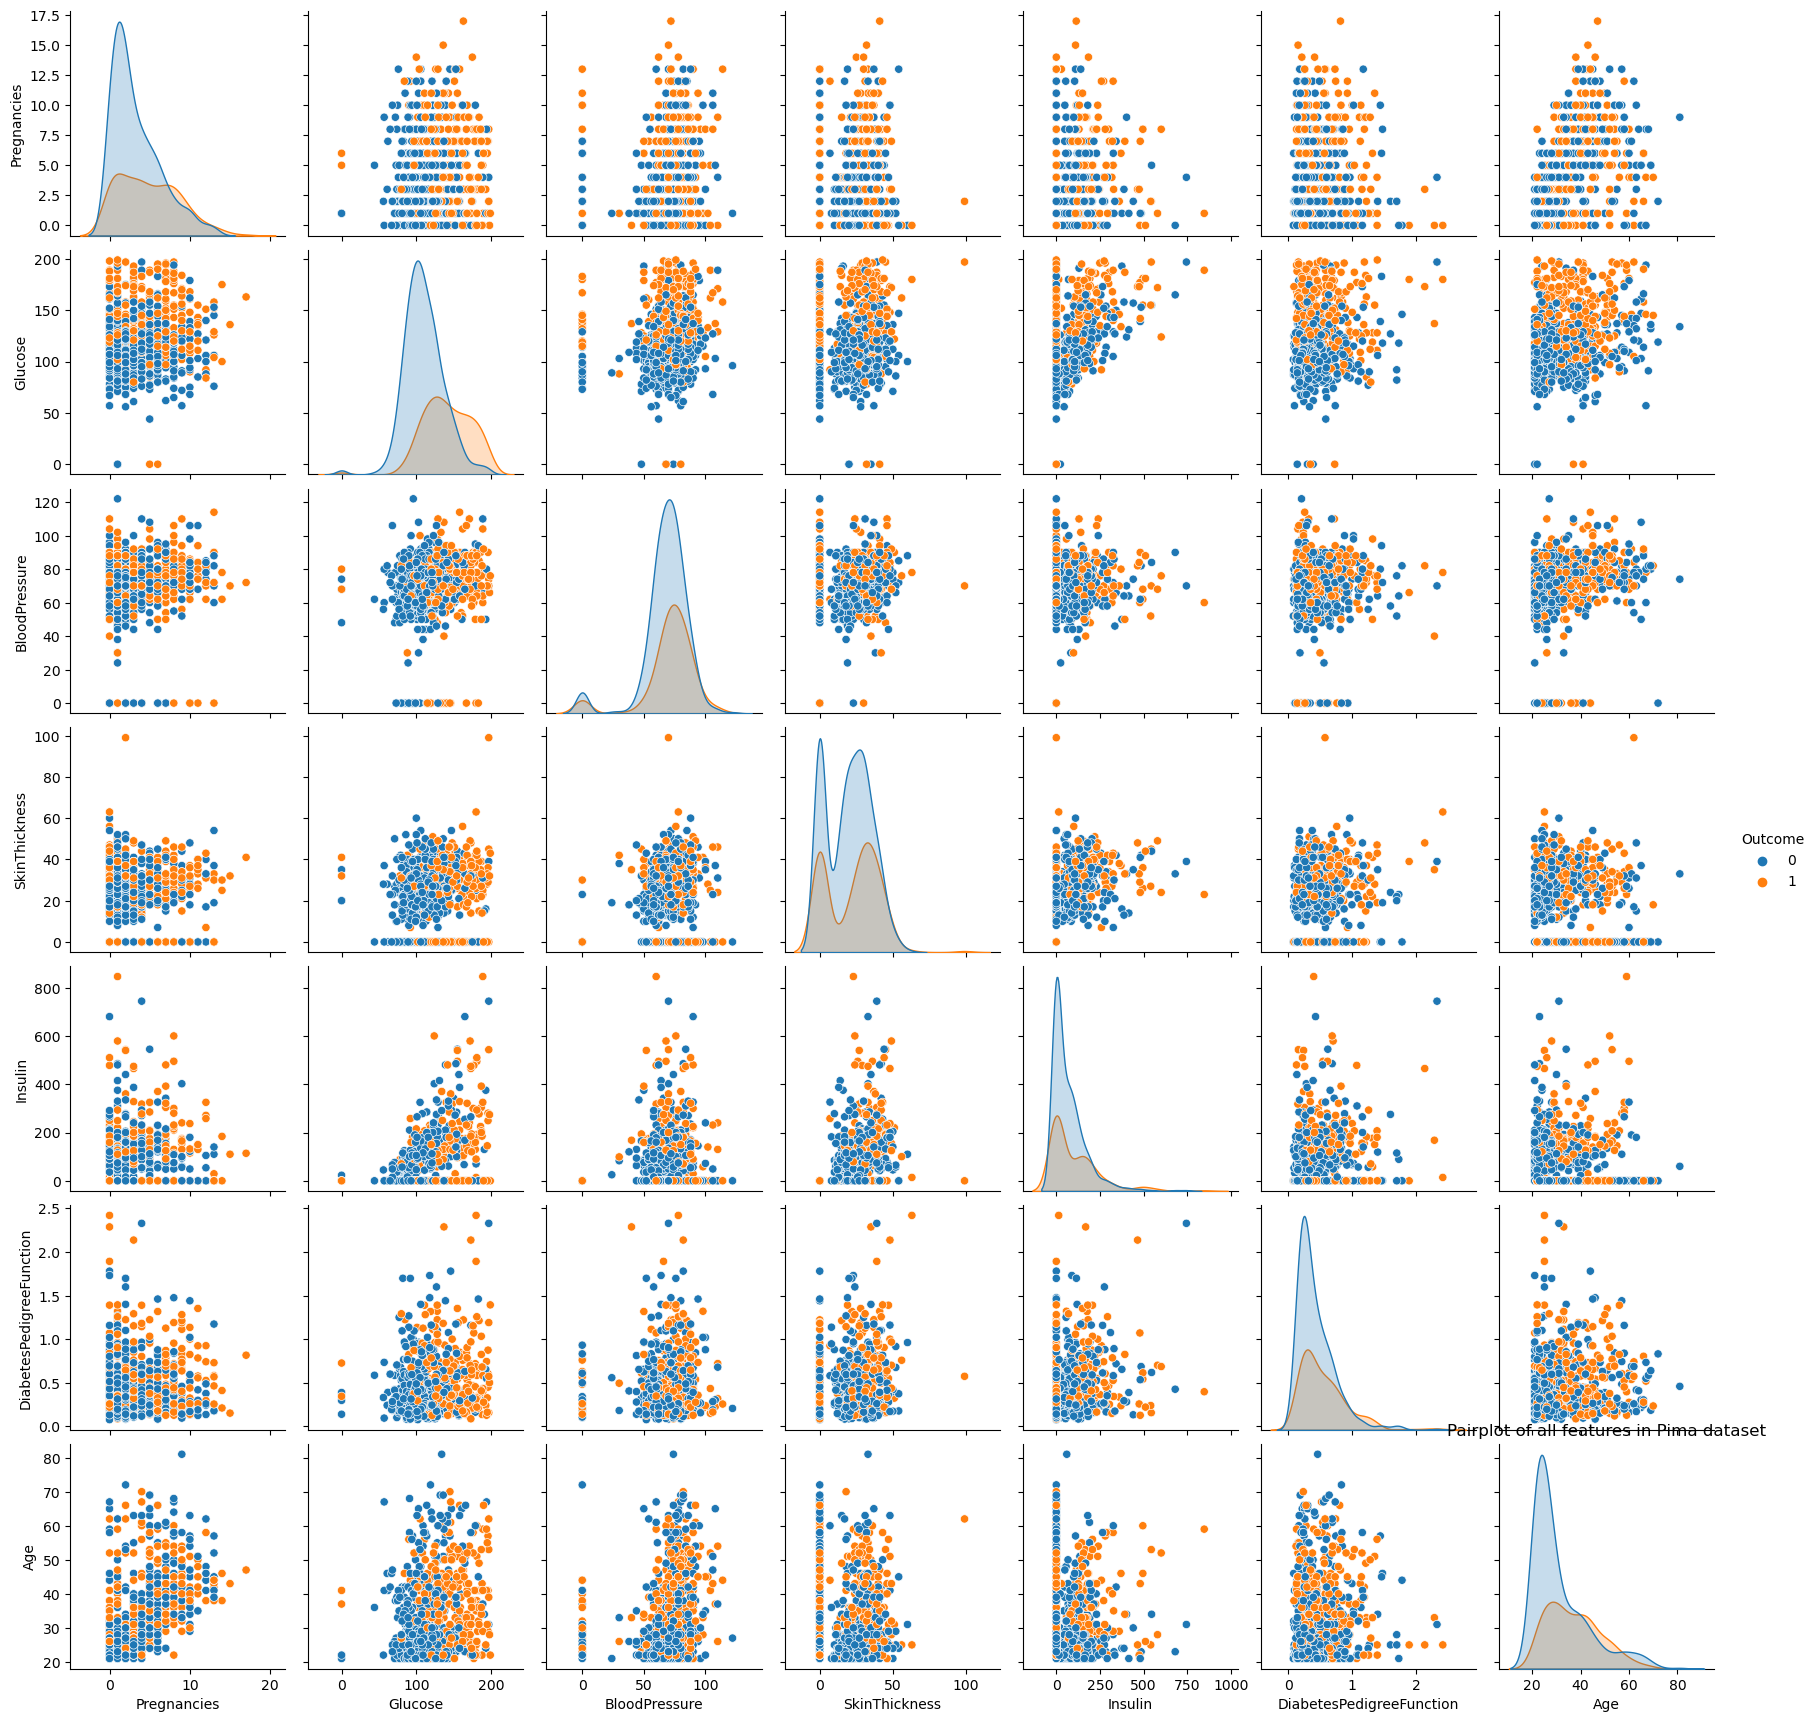


	Correlation among features is plotted


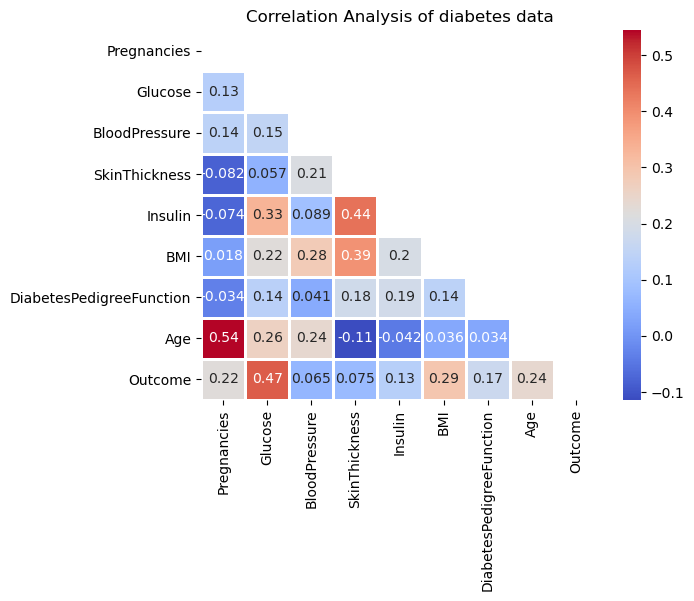


	Printing stats of the dataset
         Pregnancies    Glucose    BloodPressure    SkinThickness    Insulin        BMI    DiabetesPedigreeFunction       Age     Outcome
-----  -------------  ---------  ---------------  ---------------  ---------  ---------  --------------------------  --------  ----------
count      768         768              768              768        768       768                        768         768       768
mean         3.84505   120.895           69.1055          20.5365    79.7995   31.9926                     0.471876   33.2409    0.348958
std          3.36958    31.9726          19.3558          15.9522   115.244     7.88416                    0.331329   11.7602    0.476951
min          0           0                0                0          0         0                          0.078      21         0
25%          1          99               62                0          0        27.3                        0.24375    24         0
50%          3         

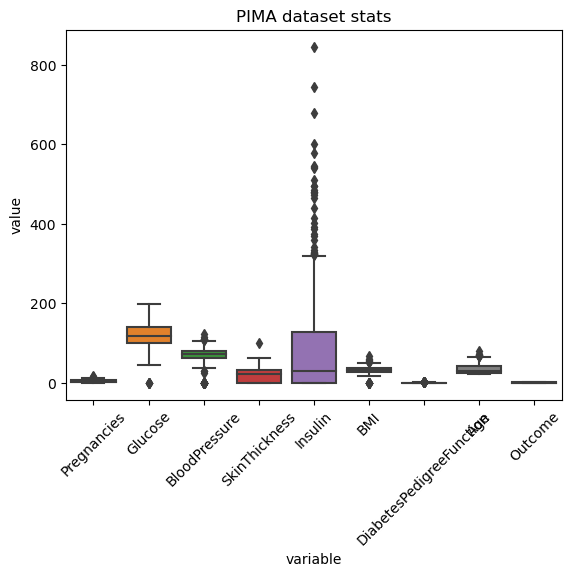


	From the box plot,one can see that there are a few features that have 0 values which means that there is some error in capturing those attributes.
	Calculating the % of records with 0 values in the dataset.
Glucose: 0.65
BloodPressure: 4.56
SkinThickness: 29.56
BMI: 1.43
Insulin: 48.7

	As the % of 0 value records is negligible for Glucose, BP and BMI, it makes sense to drop these records from further processing.

	As over 30% of dataset doesn't have info on Insulin and SkinThickness, it makes sense to impute the missing records. Used the approach of imputing the records with mean value for Insulin and linear regression for SkinThickness.


<ipython-input-1-6fe8dce98665>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thickness0_df["SkinThickness"] = linreg.predict(thickness0_df.drop(["SkinThickness","Outcome"], axis=1))


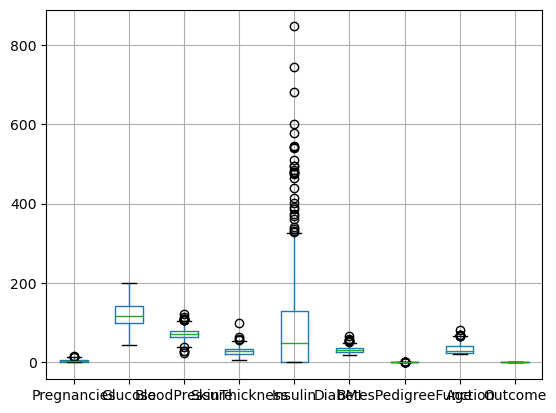


Run different classifiers and compare accuracy

	Split the data 50-50 for training and testing
Classification report for KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       233
           1       0.63      0.51      0.56       129

    accuracy                           0.72       362
   macro avg       0.69      0.67      0.68       362
weighted avg       0.71      0.72      0.71       362

Classification report for KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       233
           1       0.68      0.50      0.57       129

    accuracy                           0.74       362
   macro avg       0.72      0.68      0.69       362
weighted avg       0.73      0.74      0.73       362

Classification report for KNeighborsClassifier(n_neighbors=7):
              precision    recall  f1-score   support

           0       

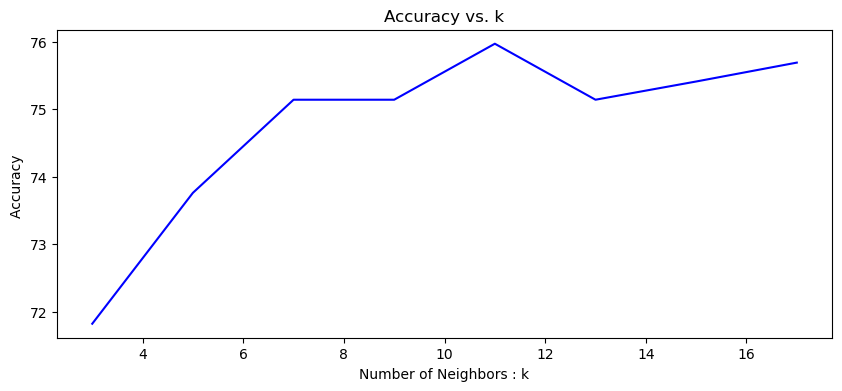


	Accuracy rates for different classifiers
Classification report for KNeighborsClassifier(n_neighbors=11):
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       233
           1       0.76      0.48      0.59       129

    accuracy                           0.76       362
   macro avg       0.76      0.70      0.71       362
weighted avg       0.76      0.76      0.74       362

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       233
           1       0.72      0.58      0.64       129

    accuracy                           0.77       362
   macro avg       0.76      0.73      0.74       362
weighted avg       0.77      0.77      0.76       362

Classification report for GaussianNB():
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       233
           1       0.64      0.54      0.5

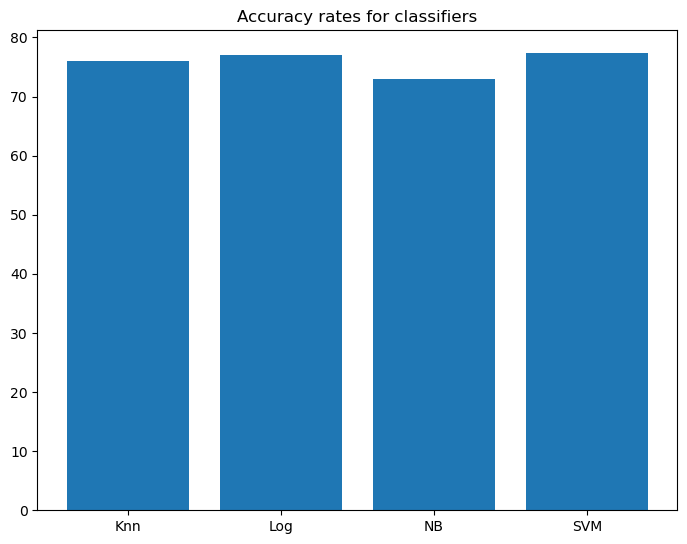

From the plot and the grid, we see that the highest accuracy rates are observed for SVM classifier.

Determine each feature's contribution to accuracy
Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       233
           1       0.73      0.53      0.62       129

    accuracy                           0.76       362
   macro avg       0.75      0.71      0.72       362
weighted avg       0.76      0.76      0.75       362

Classification report for KNeighborsClassifier(n_neighbors=11):
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       233
           1       0.70      0.50      0.59       129

    accuracy                           0.75       362
   macro avg       0.73      0.69      0.70       362
weighted avg       0.74      0.75      0.73       362

Classification report for GaussianNB():
              precision    recall  f1-score


	Feature contribution to accuracy for each classifier
╒══════════════════════════╤═══════╤═══════╤═══════╤═══════╕
│                          │   KNN │   Log │    NB │   SVM │
╞══════════════════════════╪═══════╪═══════╪═══════╪═══════╡
│ All Features             │ 75.97 │ 77.07 │ 72.93 │ 77.35 │
├──────────────────────────┼───────┼───────┼───────┼───────┤
│ Pregnancies              │  1.38 │  0.83 │ -1.38 │  0    │
├──────────────────────────┼───────┼───────┼───────┼───────┤
│ Glucose                  │  7.46 │  6.63 │  4.15 │  6.63 │
├──────────────────────────┼───────┼───────┼───────┼───────┤
│ BloodPressure            │  0.56 │  0.55 │ -3.04 │ -0.27 │
├──────────────────────────┼───────┼───────┼───────┼───────┤
│ SkinThickness            │  0.83 │  0.27 │ -1.38 │  0.28 │
├──────────────────────────┼───────┼───────┼───────┼───────┤
│ Insulin                  │  0    │  0.27 │ -2.76 │ -0.27 │
├──────────────────────────┼───────┼───────┼───────┼───────┤
│ DiabetesPedigreeFunction │ -

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 28 21:56:27 2021

@author: Vindhya
Calculate accuracy of stock data using logistic
"""

import os
import pandas as pd
import numpy as np
from sklearn . linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn . preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn . neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt

##set filenames
#input_dir = os.getcwd()
input_dir = r'C:\Users\User\OneDrive\Documents\R Assignments\CS677 Python\HW'
#root_dir = os.getcwd()

diabetes_file ='diabetes'
#details_file = 'BAC_weekly_return_volatility_detailed'
diabetes_path_file = os.path.join(input_dir, diabetes_file+'.csv')
#details_path_file = os.path.join(input_dir,details_file+'.csv')


try:
   ## Load the data
   diabetes_orig_df = pd.read_csv(diabetes_path_file)
   print("\nSuccessfully read the dataset")        
   print(tabulate(diabetes_orig_df.head(1),headers = 'keys', tablefmt = "fancy_grid"))
except Exception as e:
  print(e)
  print('Failed to read input files', diabetes_file)
  

## copy df
diabetes_df = diabetes_orig_df.copy()

print("\nData prep begins")
## Drop null rows
print("\n\tDropping null rows")
diabetes_df.dropna(how="all", inplace=True) 

## check if class variable distribution is balanced or unbalanced
print("\n\tFrom the plot, we see that the class distribution is balanced.")
sns.countplot(diabetes_df['Outcome'])
plt.title("Class label distribution")



col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','DiabetesPedigreeFunction','Age']

## class distribution by feature
print("\n\tGenerating plots to see how features measure up against the class atttribute")
plt.figure(figsize=(15, 15))
plt.title("Class Distribution of Feature")
for i, column in enumerate(col_names, 1):
    plt.subplot(3, 3, i)
    diabetes_df[diabetes_df["Outcome"] == 0][column].hist(bins=35, color='blue', label='Not Diabetic', alpha=0.6)
    diabetes_df[diabetes_df["Outcome"] == 1][column].hist(bins=35, color='red', label='Diabetic', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.suptitle('Analysis of Features vs Class')

print("\n\t From the plot, we see that the class labels are well distributed across all features")

## Pair plot of diabetes dataset
print("\n\tGenerating pairplot for all features")
sns.pairplot(diabetes_df, hue = 'Outcome', vars = col_names)
plt.title("Pairplot of all features in Pima dataset")
plt.show()

## determine correlation 
print("\n\tCorrelation among features is plotted")
mask = np.zeros_like(diabetes_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(diabetes_df.corr(), mask = mask,annot = True, cmap ='coolwarm', linewidths=2)
plt.title("Correlation Analysis of diabetes data")
plt.show()

## get stats of all features
print("\n\tPrinting stats of the dataset")
print(tabulate(diabetes_df.describe(),headers = "keys",tablefmt = "fancygrid"))
## boxplot to describe features
ax=sns.boxplot(x="variable", y="value", data=pd.melt(diabetes_df))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("PIMA dataset stats")
plt.show()

## describe df stats
diabetes_df.describe()
print("\n\tFrom the box plot,one can see that there are a few features that have 0 values which means that there is some error in capturing those attributes.\n\tCalculating the % of records with 0 values in the dataset.")

for col in ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]:
    print("{}: {}".format(col, round((diabetes_df[col].value_counts()[0]/diabetes_df.shape[0])*100,2 )))
    
print("\n\tAs the % of 0 value records is negligible for Glucose, BP and BMI, it makes sense to drop these records from further processing.")

diabetes_df = diabetes_df[ (diabetes_df["Glucose"]!=0) & (diabetes_df["BloodPressure"]!=0) & (diabetes_df["BMI"]!=0)]

print("\n\tAs over 30% of dataset doesn't have info on Insulin and SkinThickness, it makes sense to impute the missing records. Used the approach of imputing the records with mean value for Insulin and linear regression for SkinThickness.")    

# create df with 0 and non 0 values for SkinThickness
thicknessnot0_df = diabetes_df[diabetes_df["SkinThickness"]!=0]
thickness0_df = diabetes_df[diabetes_df["SkinThickness"]==0]
    
## Use Linear Regression for calculating 0 values
linreg = LinearRegression()
linreg.fit(thicknessnot0_df.drop(["SkinThickness", "Outcome"], axis=1), thicknessnot0_df["SkinThickness"])
## Predict SkinThickness for 0 value records using fit from above
thickness0_df["SkinThickness"] = linreg.predict(thickness0_df.drop(["SkinThickness","Outcome"], axis=1))
### Merge the imputed datas, then check
diabetes_df = thicknessnot0_df.append(thickness0_df)
diabetes_df.describe()
diabetes_df.boxplot()
plt.show()

## Fill 0 values for Insulin with mean
diabetes_df['Insulin']=diabetes_df['Insulin'].replace(0,diabetes_df['Insulin'].mean())

## Calculate knn accuracy
def calc_knn_acc(xtrain,ytrain,xtest,ytest,n):
    knn_classifier = KNeighborsClassifier (n_neighbors =n)
    knn_classifier.fit ( xtrain,np.ravel(ytrain ))
    knn_pred = knn_classifier.predict (xtest )
    print("Classification report for {}:\n{}".format(knn_classifier, classification_report(ytest, knn_pred)))
    return round(accuracy_score(ytest,knn_pred)*100,2)

## Calculate logistic accuracy
def calc_log_acc(xtrain,ytrain,xtest,ytest):
    log_reg_clf = LogisticRegression ()
    log_reg_clf.fit (xtrain,np.ravel(ytrain))
    log_pred = log_reg_clf.predict(xtest)
    print("Classification report for {}:\n{}".format(log_reg_clf, classification_report(ytest, log_pred)))
    return round(accuracy_score(ytest,log_pred)*100,2) 

## Calculate NB accuracy
def calc_NB_acc(xtrain,ytrain,xtest,ytest):
    gnb = GaussianNB()
    NB_classifier = gnb.fit(xtrain, np.ravel(ytrain))
    NB_pred = NB_classifier.predict(xtest)
    print("Classification report for {}:\n{}".format(gnb, classification_report(ytest, NB_pred)))
    return round(accuracy_score(ytest,NB_pred)*100,2)

## Calculate SVM accuracy
def calc_SVM_acc(xtrain,ytrain,xtest,ytest):
    svm_clf = svm.SVC(kernel='linear')
    svm_clf.fit (xtrain,np.ravel(ytrain))
    svm_pred = svm_clf.predict(xtest)
    print("Classification report for {}:\n{}".format(svm_clf, classification_report(ytest, svm_pred)))
    return round(accuracy_score(Y_test,svm_pred)*100,2)  

## split dataframe into train and test
print("\nRun different classifiers and compare accuracy")
print("\n\tSplit the data 50-50 for training and testing")
x = diabetes_df.drop(['Outcome'],axis = 1)
y = diabetes_df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.5,random_state =5)

## Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

## For knn, determine best hyperparameter
k_dict = {}
for k in range(3,19,2):
    k_dict[k] = calc_knn_acc(X_train_scaled, Y_train, X_test_scaled, Y_test, k)

## Accuracy grid    
print('\n\tKNN Classifier - accuracy rates for k = 3,5,7,9,11,13,15,17  ')
knn_accuracy_df = pd.DataFrame(k_dict,index = ['Accuracy'])
knn_accuracy_df = knn_accuracy_df.transpose()
print(tabulate(knn_accuracy_df.T, headers="keys", tablefmt="fancy_grid")) 
print('\n\t\tMost optimal k value for 2019 stock data is 15 as it seems to have the best accuracy.')

## Accuracy plot for k values
print("\n\tAccuracy plot for diffferent k values")
plt.figure( figsize =(10 ,4))
ax = plt. gca ()
ax. xaxis.set_major_locator(plt.MaxNLocator( integer = True ))
plt.plot ([3,5,7,9,11,13,15,17],knn_accuracy_df, color ='blue')
plt.title ('Accuracy vs. k')
plt.xlabel ('Number of Neighbors : k')
plt.ylabel ('Accuracy ')
plt.show()

best_k = knn_accuracy_df['Accuracy'].idxmax()

## Calculate accuracy using all features in dataset across multiple classifiers

# declare dict to store accuracies
all_accuracy_dict = {}
print("\n\tAccuracy rates for different classifiers")

all_accuracy_dict['KNN'] = calc_knn_acc(X_train_scaled,Y_train,X_test_scaled,Y_test,best_k) 

all_accuracy_dict['Log'] = calc_log_acc(X_train_scaled,Y_train,X_test_scaled,Y_test)

all_accuracy_dict['NB'] = calc_NB_acc(X_train_scaled,Y_train,X_test_scaled,Y_test)

all_accuracy_dict['SVM'] = calc_SVM_acc(X_train_scaled,Y_train,X_test_scaled,Y_test)

all_accuracy_df = pd.DataFrame(all_accuracy_dict,index=['All Features'])

print(tabulate(all_accuracy_df, headers = "keys", tablefmt = "fancy_grid"))
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers_list = ['Knn','Log','NB','SVM']
ax.bar(classifiers_list,all_accuracy_df.transpose()['All Features'])
plt.title("Accuracy rates for classifiers")
plt.show()
print("From the plot and the grid, we see that the highest accuracy rates are observed for SVM classifier.")

## calculate accuracy by dropping features
print("\nDetermine each feature's contribution to accuracy")
def calc_acc_dropped_features(log_all_accuracy,knn_all_accuracy,NB_all_accuracy,SVM_all_accuracy):
    log_dict = {}
    knn_dict = {}
    nb_dict = {}
    svm_dict = {}
    for col in col_names:
        ## create new train and test dataset with dropped feature
        dropped_feature =  col_names.copy()
        dropped_feature.remove(col)
        x_train_dropped =  X_train[dropped_feature].values
        x_test_dropped =  X_test[dropped_feature].values
        scaler = StandardScaler().fit(x_train_dropped)
        x_train_dropped = scaler.transform(x_train_dropped)
        scaler = StandardScaler().fit(x_test_dropped)
        x_test_dropped = scaler.transform(x_test_dropped)
        # run logistic on dropped feature dataset 
        log_dict[col] = log_all_accuracy - calc_log_acc(x_train_dropped,Y_train,x_test_dropped,Y_test)
        # run knn on dropped feature dataset
        knn_dict[col] = knn_all_accuracy -calc_knn_acc(x_train_dropped,Y_train,x_test_dropped,Y_test,best_k)
        # run NB on dropped feature dataset
        nb_dict[col] = NB_all_accuracy - calc_NB_acc(x_train_dropped,Y_train,x_test_dropped,Y_test)
        # run SVM on dropped feature dataset
        svm_dict[col] = SVM_all_accuracy - calc_SVM_acc(x_train_dropped,Y_train,x_test_dropped,Y_test)
  
    dropped_knn_df = pd.DataFrame(knn_dict,index = ['KNN']).transpose()
    dropped_log_df = pd.DataFrame(log_dict,index = ['Log']).transpose()
    dropped_NB_df = pd.DataFrame(nb_dict,index = ['NB']).transpose()
    dropped_SVM_df = pd.DataFrame(svm_dict,index = ['SVM']).transpose()
    drop_df = dropped_knn_df.join(dropped_log_df,how="inner")
    drop_df = drop_df.join(dropped_NB_df,how ="inner")
    drop_df = drop_df.join(dropped_SVM_df,how="inner")
    frames = [all_accuracy_df,drop_df]
    drop_df = pd.concat(frames)
    return drop_df
   
dropped_df = calc_acc_dropped_features(all_accuracy_df.loc['All Features','Log'], all_accuracy_df.loc['All Features','KNN'],  all_accuracy_df.loc['All Features','NB'], all_accuracy_df.loc['All Features','SVM'])

## print results of feature contribution analysis
print("\n\tFeature contribution to accuracy for each classifier")
print(tabulate(dropped_df,headers = "keys",tablefmt = "fancy_grid"))
print("\n\tFrom the above grid, one can conclude that Glucose is the most significant contributor towards the accuracy rates of a classifier.")


